# Data

We'll be using the [fake news dataset](https://www.kaggle.com/mrisdal/fake-news) from kaggle for this notebook. The dataset contains text and metadata scraped from 244 websites tagged as "bullshit" by the [BS Detector](https://github.com/selfagency/bs-detector) Chrome Extension by [Daniel Sieradski](https://github.com/selfagency).

In [62]:
import pandas as pd

df_fake = pd.read_csv('fake.csv')
df_fake = df_fake[['title', 'text', 'language']]
df_fake = df_fake.loc[(pd.notnull(df_fake.title)) & (pd.notnull(df_fake.text)) & (df_fake.language == 'english')]
df_fake = df_fake.reset_index(drop=True)
df_fake

title  \
0      Muslims BUSTED: They Stole Millions In Gov’t B...   
1      Re: Why Did Attorney General Loretta Lynch Ple...   
2      BREAKING: Weiner Cooperating With FBI On Hilla...   
3      PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...   
4      FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...   
5      Hillary Goes Absolutely Berserk On Protester A...   
6      BREAKING! NYPD Ready To Make Arrests In Weiner...   
7      WOW! WHISTLEBLOWER TELLS CHILLING STORY Of Mas...   
8      BREAKING: CLINTON CLEARED...Was This A Coordin...   
9      EVIL HILLARY SUPPORTERS Yell "F*ck Trump"…Burn...   
10     YIKES! HILLARY GOES OFF THE RAILS…Pulls A Howa...   
11     SAY GOODBYE! These 23 Hollywood Celebs Threate...   
12     NOT KIDDING: Colleges Give Students “Safe Spac...   
13     BOOM! MATH SHOWS Trump Would Have Beaten Obama...   
14     BOOM! This Is How President Reagan Handled Pro...   
15     TRUMP SUPPORTER GOT NUTS On MSNBC Reporter Cov...   
16     TOMI LAHREN Has Special Message For Celebritie...   
17     #BoycottComedian…ROBERT DENIRO Wanted “To Punc...   
18     HE’S NEVER SOLD AN ORIGINAL PAINTING UNTIL NOW...   
19     SORRY LIBERALS…You Can Stop With The Petitions...   
20     MARK CUBAN: "In The Event Donald Wins, I Have ...   
21     TRUMP SUPPORTER Whose Brutal Beating By Black ...   
22     WOW! WHITE Liberals Suggest Blacks Are Too Stu...   
23     LOL! BRITISH WIFE Of LIB ACTOR Who Said: “Ther...   
24     EPIC! TUCKER CARLSON Demolishes NYC Councilman...   
25     FUNNY! SNL’S SOLUTION To Democrat Election Den...   
26     DONALD TRUMP Calls Meeting With Press…Dresses ...   
27     OOPS! CRYBABY HAMILTON STARS Who Lectured Penc...   
28     WHITE TRUMP-BASHING LIB Reprimanded On LIVE CN...   
29         BOOM! Kellyanne Conway Shuts Down CNN’s Cuomo   
...                                                  ...   
11647  Russia Develops Cheap, Easily Replaceable Mini...   
11648  Clinton Kicks Huma Abedin From Plane As FBI Ob...   
11649  Wild Buffalo Appear At Site Of Standing Rock P...   
11650  Classified Material Found In Emails Between Cl...   
11651  Video Evidence Of Biggest Election Fraud In U....   
11652  UK Officially Declare Russia ‘Threat To Nation...   
11653  World War 3: Putin Declares Norway An ‘Enemy’ ...   
11654  Michelle Obama Deletes Hillary Clinton From Tw...   
11655  FBI To Scour 650k Emails Linked To Private Ser...   
11656  Lebanon Chooses Iran And Hezbollah Ally Michel...   
11657  FBI Insider: Clinton Emails Linked To Politica...   
11658  Freddy Krueger Escapes Shooting – Injures Five...   
11659  UN & Amnesty Investigate Human Rights Violatio...   
11660  Turkish Military Deploy Tanks And Equipment To...   
11661   Australia Is Worried Foreign Migrants Are Coming   
11662  Johnson & Johnson Lose Third Multimillion Doll...   
11663  Texas County Enacts "Emergency Paper Ballots" ...   
11664  Bank of England Asks UK Banks To Detail Their ...   
11665  As Calais "Jungle" Burns, Refugees Try To Stor...   
11666                           Don't Diss The Dark Ages   
11667  Bitcoin Soars As China Launches Crackdown On W...   
11668  Project Veritas 4: Robert Creamer's Illegal $2...   
11669  Snapchat To Raise Up To $4 Billion In IPO, Val...   
11670  Love Him Or Hate Him: Trump Is The Revolution ...   
11671  Stocks Pump'n'Dump As Crude Crumbles To 3-Week...   
11672  Tesla Earnings Smash Expectations After Dramat...   
11673   Rules For Rulers (Or How The World Really Works)   
11674  Fact Check: Trump Is Right that Clinton Might ...   
11675  Caught On Tape: ISIS Destroys Iraqi Abrams Wit...   
11676  ObamaCare Architect Admits "The Law Is Working...   

                                                    text language  
0      Print They should pay all the back all the mon...  english  
1      Why Did Attorney General Loretta Lynch Plead T...  english  
2      Red State : \nFox News Sunday reported this mo...  english  
3      Email Kayla Mueller was a prisoner and torture...  

# Pre-process

This is one of the most important step in analyzing the text data. If the preprocessing is not good, the algorithm can't do much since we are feeding it a lot of noise, in other words, **Garbage In Garbage Out**. So let's first clean our data using the following techniques:

1. Tokenization
2. Stopword removal
3. Strip punctuation
4. Lemmatization
5. Bigram collocation detection. (Bigrams are sets of two adjacent tokens. Collocations are frequently co-occurring tokens. Using bigrams, phrases like "machine_learning" can be discovered in our output which otherwise would have been treated as two separate words "machine" and "learning". Spaces are replaced with underscores in corpus)

Note: Stemming and lemmatization are two different processes for reducing the morphological variation of words. 
- Stemming usually refers to a crude heuristic process that chops off the ends of words in the hope of achieving this goal correctly most of the time, and often includes the removal of derivational affixes.

- Lemmatization usually refers to doing things properly with the use of a vocabulary and morphological analysis of words, normally aiming to remove inflectional endings only and to return the base or dictionary form of a word, which is known as the lemma.

    The word "better" has "good" as its lemma. This link is missed by stemming, as it requires a dictionary look-up.

    The word "walk" is the base form for word "walking", and hence this is matched in both stemming and lemmatisation.

In [ ]:
import os, re
from gensim.parsing.preprocessing import remove_stopwords, strip_punctuation

import nltk
nltk.download('wordnet') # download wordnet to be used in lemmatization
from nltk.stem import WordNetLemmatizer

def preprocess(texts):
    # tokenization
    texts = [re.findall(r'\w+', line.lower()) for line in texts]
    # remove stopwords
    texts = [remove_stopwords(' '.join(line)).split() for line in texts]
    # remove punctuation
    texts = [strip_punctuation(' '.join(line)).split() for line in texts]
    # remove words that are only 1-2 character
    texts = [[token for token in line if len(token) > 2] for line in texts]
    # remove numbers
    texts = [[token for token in line if not token.isnumeric()] for line in texts]
    # lemmatization 
    lemmatizer = WordNetLemmatizer()
    texts = [[word for word in lemmatizer.lemmatize(' '.join(line), pos='v').split()] for line in texts]
    
    return texts

# pre-processing
processed_texts = preprocess(df_fake.text)

In [ ]:
doc_number = 0
processed_texts[doc_number]

In [ ]:
from gensim.models.phrases import Phrases, Phraser

# training for bigram collocation detection
phrases = Phrases(processed_texts, min_count=1, threshold=0.8, scoring='npmi')

Then we create a performant Phraser object to transform any tokenized sentence.

In [ ]:
bigram = Phraser(phrases)

In [ ]:
bigram[['white', 'house', 'million', 'money']]

In [ ]:
# merging detected collocations with data
processed_texts = list(bigram[processed_texts])

In [ ]:
from gensim.corpora import Dictionary

# create dictionary mappings for training data
dictionary = Dictionary(processed_texts)

We now remove rare words and common words based on their document frequency to further prevent noisy results. Below we remove words that appear in less than 10 documents or in more than 60% of the documents.

In [ ]:
# Filter out words that occur less than 10 documents, or more than 60% of the documents.
dictionary.filter_extremes(no_below=10, no_above=0.6)

Finally, we transform the documents to a vectorized form. We simply compute the frequency of each word, including the bigrams.

In [ ]:
corpus = [dictionary.doc2bow(text) for text in processed_texts]

Let's see how our final corpus looks like in vectorized form.

In [ ]:
doc_number = 0
corpus[doc_number]

A document is represented as a list of tuples of (vocab ID, frequency) for each word.

# Train

Now that we have our corpus and dictionary, we train the topic model using gensim's api for LDA algorithm.

In [12]:
from gensim.models import LdaModel

# training LDA model
model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=35, passes=50 , chunksize=1500, iterations=200, alpha='auto')

In [17]:
model.save('lda_model')

In [27]:
model = LdaModel.load('models/lda_model')

Now we'll see what the typical output of a topic model looks like. Below, we print top 5 topics. As we can see, each topic is associated with a set of words, and each word has a probability of being expressed under that topic.

In [14]:
model.show_topics(num_topics=5)

[(2,
  '0.062*"text" + 0.059*"com" + 0.032*"results" + 0.031*"force" + 0.028*"brain" + 0.027*"http_www" + 0.025*"http" + 0.023*"content" + 0.022*"infowars" + 0.021*"comment"'),
 (24,
  '0.040*"oil" + 0.032*"gas" + 0.025*"energy" + 0.019*"pipeline" + 0.013*"kennedy" + 0.012*"texas" + 0.009*"quoting" + 0.009*"warren" + 0.007*"foster" + 0.007*"pipelines"'),
 (18,
  '0.039*"news" + 0.032*"media" + 0.028*"com" + 0.020*"facebook" + 0.020*"october" + 0.016*"information" + 0.014*"twitter" + 0.013*"post" + 0.011*"https" + 0.010*"video"'),
 (1,
  '0.019*"said" + 0.014*"women" + 0.009*"children" + 0.008*"told" + 0.008*"woman" + 0.008*"man" + 0.007*"old" + 0.007*"year" + 0.007*"child" + 0.007*"family"'),
 (8,
  '0.024*"people" + 0.018*"like" + 0.013*"know" + 0.013*"going" + 0.013*"think" + 0.010*"way" + 0.009*"time" + 0.009*"want" + 0.009*"right" + 0.008*"good"')]

There are other APIs that can be used to explore the trained topic model, for getting further information about our data.

The function `get_term_topics` returns the odds of a particular word belonging to some particular topic.

In [24]:
model.get_term_topics('money')

[(13, 0.01794759), (25, 0.012330164)]

The `get_document_topics` method returns topic distribution of the document along with topic distribution for each word in that document.

In [26]:
doc_number = 0
doc_topic, word_topic, phi_value = model.get_document_topics(corpus[doc_number], per_word_topics=True)

In [27]:
doc_topic

[(3, 0.0496558),
 (8, 0.11088632),
 (9, 0.22936998),
 (10, 0.3285545),
 (13, 0.1614666),
 (32, 0.026059236)]

The output gives the topic distribution of the document.

In [28]:
word_topic

[(0, [32, 3]),
 (1, [13, 9, 32, 3]),
 (2, [9]),
 (3, [9, 8, 10, 13, 1]),
 (4, [10, 9, 32, 13]),
 (5, [10, 9]),
 (6, [10, 8, 3]),
 (7, [9]),
 (8, [8, 13, 3, 9, 32]),
 (9, [13, 10, 1]),
 (10, [10, 13]),
 (11, [10, 13, 9]),
 (12, [10, 9, 3]),
 (13, [9]),
 (14, [8, 32, 3, 13]),
 (15, [13, 9]),
 (16, [13, 8]),
 (17, [9, 10, 8, 32]),
 (18, [9]),
 (19, [8, 13, 9, 3, 10, 32]),
 (20, [10, 9, 3, 32]),
 (21, [13, 8, 10]),
 (22, [10]),
 (23, [10, 13, 8]),
 (24, [9]),
 (25, [10, 32, 9]),
 (26, [9, 10, 13]),
 (27, [3]),
 (28, [10, 8, 9]),
 (29, [10]),
 (30, [10]),
 (31, [8, 13, 3, 9, 32, 10]),
 (32, [13, 9, 10, 8, 3])]

The output gives a ranked list of topics for every word. The lower the rank, more is the probability of the word  belonging to that topic in the document.

In [29]:
phi_value

[(0, [(3, 0.33239487), (32, 0.6676051)]),
 (1, [(3, 0.02049562), (9, 0.090417124), (13, 0.84401816), (32, 0.045068584)]),
 (2, [(9, 0.9989348)]),
 (3,
  [(1, 0.011692263),
   (8, 0.26369056),
   (9, 0.37287816),
   (10, 0.2540952),
   (13, 0.0960119)]),
 (4, [(9, 0.12800522), (10, 0.81772053), (13, 0.02543425), (32, 0.028267182)]),
 (5, [(9, 0.17595136), (10, 0.8217225)]),
 (6, [(3, 0.07715881), (8, 0.18010566), (10, 0.7304642)]),
 (7, [(9, 0.99268293)]),
 (8,
  [(3, 0.06301904),
   (8, 0.6602986),
   (9, 0.04608846),
   (13, 0.20390937),
   (32, 0.024669405)]),
 (9, [(1, 0.013962103), (10, 0.33027285), (13, 0.6549568)]),
 (10, [(10, 0.6749278), (13, 0.32440084)]),
 (11, [(9, 0.11907982), (10, 1.4056469), (13, 0.464389)]),
 (12, [(3, 0.11003059), (9, 0.6846023), (10, 1.2013872)]),
 (13, [(9, 0.9999353)]),
 (14,
  [(3, 0.03808569), (8, 0.88311803), (13, 0.028838187), (32, 0.044042137)]),
 (15, [(9, 0.25587088), (13, 0.7439024)]),
 (16, [(8, 0.039554108), (13, 0.959679)]),
 (17, [(8, 0.0

Phi values are essentially the probability of that word in that document belonging to a particular topic.

# Evaluation

## Manual:

We would like to know if the correct thing has been learned, does the topics inferred make sense as per our text data.
Thanks to pyLDAvis, we can visualise our topic models in a really handy way and inspect what words the topics consist of or how similar the topics are.

In [28]:
import pyLDAvis.gensim

pyLDAvis.enable_notebook()
pyLDAvis.gensim.prepare(model, corpus, dictionary, sort_topics=False)

/Users/parul/.virtualenvs/ie_tutorial/lib/python3.6/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.146953  0.142614       1        1   4.534055
1     -0.015106 -0.160652       2        1   4.889171
2     -0.098155 -0.068349       3        1   0.621893
3     -0.058600  0.105065       4        1   5.889043
4     -0.051028 -0.047572       5        1   1.325640
5     -0.121587  0.065400       6        1   1.417704
6      0.136288  0.157116       7        1   1.206868
7     -0.161734 -0.128134       8        1   1.707884
8     -0.146546 -0.062845       9        1  11.161173
9      0.105417  0.031952      10        1   4.010401
10     0.113986  0.021138      11        1   3.787087
11     0.035862  0.087375      12        1   5.664336
12    -0.103006 -0.078318      13        1   3.191461
13    -0.077110  0.029337      14        1   2.864889
14     0.088325 -0.100653      15        1   3.250295
15     0.093877 -0.017951      16        1   1.304898
16     0.142524 -0.180289      17        1   3.707848
17     0.147393 -0.182154      18        1   3.787951
18     0.027008 -0.123999      19        1   2.800126
19    -0.209726 -0.038899      20        1   2.723716
20    -0.068778  0.029933      21        1   3.318069
21     0.176109 -0.147605      22        1   3.745580
22     0.112977  0.193255      23        1   1.590665
23     0.048017 -0.083929      24        1   1.475249
24    -0.080173  0.044035      25        1   0.589849
25    -0.034862  0.085661      26        1   2.456980
26    -0.084769  0.058331      27        1   2.267463
27     0.014930  0.247020      28        1   1.237790
28    -0.039531 -0.046760      29        1   2.083795
29    -0.119909  0.029265      30        1   2.813702
30     0.188865 -0.101601      31        1   2.161667
31     0.122652  0.096971      32        1   2.452955
32    -0.223821  0.002136      33        1   2.014237
33    -0.029267  0.037278      34        1   0.679558
34     0.022525  0.105828      35        1   1.266006, topic_info=      Category          Freq           Term         Total  loglift  logprob
term                                                                       
240    Default  24863.000000          trump  24863.000000  30.0000  30.0000
156    Default  23431.000000        clinton  23431.000000  29.0000  29.0000
177    Default  15513.000000        hillary  15513.000000  28.0000  28.0000
2223   Default   8319.000000         russia   8319.000000  27.0000  27.0000
101    Default   8781.000000          obama   8781.000000  26.0000  26.0000
668    Default  10572.000000       election  10572.000000  25.0000  25.0000
221    Default   6505.000000         donald   6505.000000  24.0000  24.0000
2224   Default   5202.000000        russian   5202.000000  23.0000  23.0000
170    Default   6158.000000            fbi   6158.000000  22.0000  22.0000
2876   Default   9242.000000            war   9242.000000  21.0000  21.0000
233    Default  10390.000000      president  10390.000000  20.0000  20.0000
55     Default   4870.000000            com   4870.000000  19.0000  19.0000
143    Default  11398.000000          world  11398.000000  18.0000  18.0000
200    Default  14554.000000           said  14554.000000  17.0000  17.0000
558    Default   4007.000000         police   4007.000000  16.0000  16.0000
1118   Default   8229.000000          media   8229.000000  15.0000  15.0000
312    Default  20070.000000         people  20070.000000  14.0000  14.0000
360    Default   7470.000000       campaign   7470.000000  13.0000  13.0000
14     Default  12712.000000           like  12712.000000  12.0000  12.0000
190    Default   6927.000000           news   6927.000000  11.0000  11.0000
2816   Default   4681.000000          syria   4681.000000  10.0000  10.0000
1414   Default   5382.000000       military   5382.000000   9.0000   9.0000
11     Default  10098.000000     government  10098.000000   8.0000   8.0000
723    Default   4462.000000           vote   4462.000000  

We can see what topics does the fake news primarily focuses on, and according to our dataset its mostly about politics. 

#### Left Panel:

1. The area of the circles is proportional to the prevalence of the topics in corpus. So, we can visually determine about the most important topics in our corpus.
2. The positioning of the topics is done according to their inter-topic distances, which to some extent preserves the semantic similarity allowing some related topics to form clusters, it is however a little difficult to determine exactly how similar the topics are. For this, we can directly visualize the matrix of inter-topic distances and know the exact distance (with intersecting/different words) between any pair of topics.

In [29]:
import plotly.offline as py
from plotly.graph_objs import *
import plotly.figure_factory as ff

py.init_notebook_mode()

def plot_difference(mdiff, title="", annotation=None):
    """
    Helper function to plot difference between models
    """
    annotation_html = None
    if annotation is not None:
        annotation_html = [["+++ {}<br>--- {}".format(", ".join(int_tokens), ", ".join(diff_tokens))
                            for (int_tokens, diff_tokens) in row]
                           for row in annotation]
        
    data = Heatmap(z=mdiff, colorscale='RdBu', text=annotation_html)
    layout = Layout(width=950, height=950, title=title,
                       xaxis=dict(title="topic"), yaxis=dict(title="topic"))
    py.iplot(dict(data=[data], layout=layout))

In [30]:
difference_matrix, annotation = model.diff(model, distance='jensen_shannon', num_words=50)
plot_difference(difference_matrix, title="Topic difference [jensen shannon distance]", annotation=annotation)

The 2D coordinates which are inferred for each topic in the left panel of pyldavis are based on above distance matrix. [Principal coordinate analysis (PCoA)](https://mb3is.megx.net/gustame/dissimilarity-based-methods/principal-coordinates-analysis) is used for infering the 2d coordinates which seeks to preserve the original topic distances of higher dimensions. You can refer to [this](http://occamstypewriter.org/boboh/2012/01/17/pca_and_pcoa_explained/) blog for getting a graphical reasoning behind this technique.


#### Right Panel:

1. The terms are initially ranked according to their saliency, when no topic is selected. Saliency basically depends on frequency of the term in corpus, and how informative the specific term w is for determining the individual topics.  For example, if a word w occurs in all topics, observing the word tells us little about the document’s topical mixture <sup>[1]</sup>.
2. The tuning parameter, 0≤λ≤1, controls how the terms are ranked for each selected topic, with terms listed in decreasing order of relevance. The relevance of term w to topic t is defined as λ*p(w∣t)+(1−λ)*p(w∣t)/p(w). Values of λ near 1 give high relevance rankings to frequent terms within a given topic, whereas values of λ near zero give high relevance rankings to exclusive terms within a topic i.e. it factors in the general probability of that word in other topics.

But how does this ranking relate to the ranking of terms in gensim's `show_topic()` method that we saw above. In gensim, the float value given, next to every term as shown in the list output of `show_topic()` is the value of p(w∣t) i.e. probability of term w for topic t, and gensim simply ranks the topic terms according to this probability value. So, in order to have similar results as gensim’s `show_topic()` in pyLDAvis, λ can be set to 1 which will then result in the relevance being directly proportional to only p(w∣t). 

Now if we choose λ very close to 1, common terms of the corpus appear near the top for multiple topics, making it hard to differentiate between the meanings of different topics. And if choose λ very close to 0, it can still remain noisy, by giving high rankings to very rare terms that occur in only a single topic, for instance. While such terms may contain useful topic content, but if they are very rare the topic may remain difficult to interpret.

The optimal value suggested for λ is 0.6<sup>[2]</sup>.



## Automatic:

[Coherence](http://qpleple.com/topic-coherence-to-evaluate-topic-models/) is often used to get past the manual inspection and objectively compare the topic models. By returning a score, we can compare between different topic models of the same corpus.

In [35]:
from gensim.models import CoherenceModel

CoherenceModel(model, texts=processed_texts, dictionary=dictionary, window_size=10).get_coherence()

0.45504539003781874

Following is a really nice explanation for understanding the intution behind coherence that I came across in Matti Lyra's [Pydata Berlin talk](https://github.com/mattilyra/pydataberlin-2017/blob/master/notebook/EvaluatingUnsupervisedModels.ipynb):

Take the following document that talk about ice hockey. I've highlighted terms that I think are related to the subject matter, you may disagree with my judgement. Notice that among the terms that I've highlighted as being part of the topic of Ice Hockey are words such as Penguin, opposing and shots. None of these on the face of it would appear to belong to Ice Hockey, but seeing them in context makes it clear that Penguin refers to the ice hockey team, shots refers to disk shaped pieces of vulcanised rubber being launched at the goal at various different speeds and opposing refers to the opposing team.

> Rinne stopped 27 of 28 **shots** from the **Penguins** in **Game** 6 at home Sunday, but that lone **goal** allowed was enough for the **opposition** to break out the **Stanley Cup trophy** for the second straight **season**.

Given the terms that I've determined to be a partial description of Ice Hockey (the concept), one could conceivably measure the coherence of that concept by counting how many times those terms occur with each other i.e. co-occur in some sufficiently large reference corpus.

One of course encounters a problem should the reference corpus never refer to ice hockey. A poorly selected reference corpus could for instance be patent applications from the 1800s, it would be unlikely to find those word pairs in that text.

This is precisely what several research papers have aimed to do. To take the top words from the topics in a topic model and measure the support for those words forming a coherent concept / topic by looking at the co-occurrences of those terms in a reference corpus. The research up to now was finally wrapped up into a single paper where the authors develop a coherence pipeline, which allows plugging in all the different methods into a single framework. This coherence pipeline is partially implemented in gensim.

# Application

In this section, we will go through some of the applications or ways in which we can use topic models and get the most out of them for our NLP tasks.


## Document clustering

Using the `get_document_topics`, we can visualize the documents based on their topic distribution. That topic distribution representation of each document can be used for clustering the semantically similar documents together. 

In [56]:
# Get document topics
all_topics = model.get_document_topics(corpus, minimum_probability=0)
all_topics[0]

[(0, 0.002234739),
 (1, 0.0005160754),
 (2, 7.553524e-05),
 (3, 0.076026514),
 (4, 0.010881234),
 (5, 0.000119269534),
 (6, 9.313105e-05),
 (7, 0.00022521414),
 (8, 0.07348532),
 (9, 0.028488016),
 (10, 0.108176745),
 (11, 0.00036097402),
 (12, 0.0260619),
 (13, 0.14317961),
 (14, 0.00018988855),
 (15, 8.4550535e-05),
 (16, 0.02548546),
 (17, 0.023446916),
 (18, 0.011574134),
 (19, 0.00019444633),
 (20, 0.0002224284),
 (21, 0.20223051),
 (22, 9.08835e-05),
 (23, 0.008082816),
 (24, 7.794049e-05),
 (25, 0.00015000124),
 (26, 0.00011584871),
 (27, 0.000101335725),
 (28, 0.0001699926),
 (29, 0.008512462),
 (30, 0.21120998),
 (31, 0.014079499),
 (32, 0.00012345285),
 (33, 0.01911207),
 (34, 0.0048210653)]

The above output shows the topic distribution of first document in the corpus as a list of (topic_id, topic_probability).

Now, using the topic distribution of a document as it's vector representation, we will plot all the documents in our corpus using Tensorboard.

### Prepare the Input files for Tensorboard

Tensorboard takes two input files, one containing the embedding vectors and the other containing relevant metadata. As described above, we will use the topic distribution of documents as their representative vector and the metadata file will consist of Document titles.

In [57]:
# create file for tensors(vectors)
with open('doc_lda_tensor.tsv','w') as w:
    for doc_topics in all_topics:
        for topics in doc_topics:
            w.write(str(topics[1])+ "\t")
        w.write("\n")

In [63]:
# create file for metadata(documet titles)
with open('doc_lda_metadata.tsv','w') as w:
    for doc_id in range(len(all_topics)):
        w.write(df_fake.title[doc_id] + "\n")

Now we can go to http://projector.tensorflow.org/ and upload these two files by clicking on Load data in the left panel.

## Topic Connections

Quite often, the sheer size of text data is highly unorganized which makes it difficult to browse or search through the corpus. For instance, a scholar in a narrow subdiscipline, searching for a particular research article, would certainly be interested to learn that the topic of that article is highly correlated with another topic that the researcher may not have known about, and that is not explicitly contained in the article. Alerted to the existence of this new related topic, the researcher could browse the collection in a topic-guided manner to begin to investigate connections to a previously unrecognized body of work. Topic connections can be extremely useful especially for the datasets with interdisciplinary interests.

### Topic Network

Networks can be a great way to explore topic models. We can use it to navigate that how topics belonging to one context may relate to some topics in other context and discover common factors between them. We can use them to find communities of similar topics and pinpoint the most influential topic that has large no. of connections or perform any number of other workflows designed for network analysis.

In [66]:
# get topic distributions
topic_dist = model.state.get_lambda()

# get topic terms
num_words = 50
topic_terms = [{w for (w, _) in model.show_topic(topic, topn=num_words)} for topic in range(topic_dist.shape[0])]

Firstly, a distance matrix is calculated to store distance between every topic pair. 

In [67]:
from scipy.spatial.distance import pdist, squareform
from gensim.matutils import jensen_shannon
import networkx as nx
import itertools as itt

# calculate distance matrix using the input distance metric
def distance(X, dist_metric):
    return squareform(pdist(X, lambda u, v: dist_metric(u, v)))

topic_distance = distance(topic_dist, jensen_shannon)
topic_distance

array([[0.        , 0.56972635, 1.04445863, ..., 0.67866004, 0.90184504,
        0.70947909],
       [0.56972635, 0.        , 1.04737461, ..., 0.65568024, 0.94913214,
        0.78746349],
       [1.04445863, 1.04737461, 0.        , ..., 0.77790827, 0.64454103,
        0.70410562],
       ...,
       [0.67866004, 0.65568024, 0.77790827, ..., 0.        , 0.74128306,
        0.66311091],
       [0.90184504, 0.94913214, 0.64454103, ..., 0.74128306, 0.        ,
        0.64512897],
       [0.70947909, 0.78746349, 0.70410562, ..., 0.66311091, 0.64512897,
        0.        ]])

The edges will be created based on the distance between topic pair. Next, we'd have to define a threshold of distance value such that the topic-pairs with distance above that does not get connected.

In [68]:
import numpy as np

# store edges b/w every topic pair along with their distance
edges = [(i, j, {'weight': topic_distance[i, j]})
         for i, j in itt.combinations(range(topic_dist.shape[0]), 2)]

# keep edges with distance below the threshold value
k = np.percentile(np.array([e[2]['weight'] for e in edges]), 20)
edges = [e for e in edges if e[2]['weight'] < k]

The nodes of the network graph will represent topics and the edges represent distance between two connecting nodes/topics. 

In [69]:
# add nodes and edges to graph layout
G = nx.Graph()
G.add_nodes_from(range(topic_dist.shape[0]))
G.add_edges_from(edges)

graph_pos = nx.spring_layout(G)

# initialize traces for drawing nodes and edges 
node_trace = Scatter(
    x=[],
    y=[],
    text=[],
    mode='markers',
    hoverinfo='text',
    marker=Marker(
        showscale=True,
        colorscale='YIGnBu',
        reversescale=True,
        color=[],
        size=10,
        colorbar=dict(
            thickness=15,
            xanchor='left'
        ),
        line=dict(width=2)))

edge_trace = Scatter(
    x=[],
    y=[],
    text=[],
    line=Line(width=0.5, color='#888'),
    hoverinfo='text',
    mode='lines')


# no. of terms to display in annotation
n_ann_terms = 10

# add edge trace with annotations
for edge in G.edges():
    x0, y0 = graph_pos[edge[0]]
    x1, y1 = graph_pos[edge[1]]
    
    pos_tokens = topic_terms[edge[0]] & topic_terms[edge[1]]
    neg_tokens = topic_terms[edge[0]].symmetric_difference(topic_terms[edge[1]])
    pos_tokens = list(pos_tokens)[:min(len(pos_tokens), n_ann_terms)]
    neg_tokens = list(neg_tokens)[:min(len(neg_tokens), n_ann_terms)]
    annotation = "<br>".join((": ".join(("+++", str(pos_tokens))), ": ".join(("---", str(neg_tokens)))))
    
    x_trace = list(np.linspace(x0, x1, 10))
    y_trace = list(np.linspace(y0, y1, 10))
    text_annotation = [annotation] * 10
    x_trace.append(None)
    y_trace.append(None)
    text_annotation.append(None)
    
    edge_trace['x'] += x_trace
    edge_trace['y'] += y_trace
    edge_trace['text'] += text_annotation

# add node trace with annotations
for node in G.nodes():
    x, y = graph_pos[node]
    node_trace['x'].append(x)
    node_trace['y'].append(y)
    node_info = ''.join((str(node+1), ': ', str(list(topic_terms[node])[:n_ann_terms])))
    node_trace['text'].append(node_info)
    
# color node according to no. of connections
for node, adjacencies in enumerate(nx.generate_adjlist(G)):
    node_trace['marker']['color'].append(len(adjacencies))
    
fig = Figure(data=Data([edge_trace, node_trace]),
             layout=Layout(showlegend=False,
                hovermode='closest',
                xaxis=XAxis(showgrid=True, zeroline=False, showticklabels=True),
                yaxis=YAxis(showgrid=True, zeroline=False, showticklabels=True)))

py.iplot(fig)

On hovering over the nodes, we'll see the topic_id along with it's top words and on hovering over the edges, we'll see the intersecting/different words of the two topics that the edge connects.

For the above graph, we used the 20th percentile of all the distance values as our threshold. But you can experiment with few different values also such that the graph doesn’t become too crowded or too sparse and we could get an optimum amount of information about similar topics or any interesting relations between different topics.

### Topic dendrogram

The topics can be related to each other in a hierarchical form also. For ex. in case of a research paper corpora, we could have papers belonging to maths, physics, biology which can further be categorised into sub-groups. Maths papers can be sub-divided into topics such as Calculus, Algebra, Geometry; Physics papers into mechanics, electronics, astronomy; Biology into Genetics, Anatomy, Molecular etc.

Dendrogram is a tree-structured graph which can be used to visualize the result of a hierarchical clustering. We can use it to explore the topic models and see how the topics are connected to each other in a sequence of successive fusions or divisions that occur in the clustering process.

In [70]:
from scipy import spatial as scs
from scipy.cluster import hierarchy as sch

# get topic distributions
topic_dist = model.state.get_lambda()

# get topic terms
num_words = 300
topic_terms = [{w for (w, _) in model.show_topic(topic, topn=num_words)} for topic in range(topic_dist.shape[0])]

# no. of terms to display in annotation
n_ann_terms = 10

# use Jensen-Shannon distance metric in dendrogram
def js_dist(X):
    return pdist(X, lambda u, v: jensen_shannon(u, v))

# define method for distance calculation in clusters
linkagefun=lambda x: sch.linkage(x, 'single')

# calculate text annotations
def text_annotation(topic_dist, topic_terms, n_ann_terms, linkagefun):
    # get dendrogram hierarchy data
    linkagefun = lambda x: sch.linkage(x, 'single')
    d = js_dist(topic_dist)
    Z = linkagefun(d)
    P = sch.dendrogram(Z, orientation="bottom", no_plot=True)

    # store topic no.(leaves) corresponding to the x-ticks in dendrogram
    x_ticks = np.arange(5, len(P['leaves']) * 10 + 5, 10)
    x_topic = dict(zip(P['leaves'], x_ticks))

    # store {topic no.:topic terms}
    topic_vals = dict()
    for key, val in x_topic.items():
        topic_vals[val] = (topic_terms[key], topic_terms[key])

    text_annotations = []
    # loop through every trace (scatter plot) in dendrogram
    for trace in P['icoord']:
        fst_topic = topic_vals[trace[0]]
        scnd_topic = topic_vals[trace[2]]
        
        # annotation for two ends of current trace
        pos_tokens_t1 = list(fst_topic[0])[:min(len(fst_topic[0]), n_ann_terms)]
        neg_tokens_t1 = list(fst_topic[1])[:min(len(fst_topic[1]), n_ann_terms)]

        pos_tokens_t4 = list(scnd_topic[0])[:min(len(scnd_topic[0]), n_ann_terms)]
        neg_tokens_t4 = list(scnd_topic[1])[:min(len(scnd_topic[1]), n_ann_terms)]

        t1 = "<br>".join((": ".join(("+++", str(pos_tokens_t1))), ": ".join(("---", str(neg_tokens_t1)))))
        t2 = t3 = ()
        t4 = "<br>".join((": ".join(("+++", str(pos_tokens_t4))), ": ".join(("---", str(neg_tokens_t4)))))

        # show topic terms in leaves
        if trace[0] in x_ticks:
            t1 = str(list(topic_vals[trace[0]][0])[:n_ann_terms])
        if trace[2] in x_ticks:
            t4 = str(list(topic_vals[trace[2]][0])[:n_ann_terms])

        text_annotations.append([t1, t2, t3, t4])

        # calculate intersecting/diff for upper level
        intersecting = fst_topic[0] & scnd_topic[0]
        different = fst_topic[0].symmetric_difference(scnd_topic[0])

        center = (trace[0] + trace[2]) / 2
        topic_vals[center] = (intersecting, different)

        # remove trace value after it is annotated
        topic_vals.pop(trace[0], None)
        topic_vals.pop(trace[2], None)  
        
    return text_annotations

# get text annotations
annotation = text_annotation(topic_dist, topic_terms, n_ann_terms, linkagefun)

# Plot dendrogram
dendro = ff.create_dendrogram(topic_dist, distfun=js_dist, labels=range(1, 36), linkagefun=linkagefun, hovertext=annotation)
dendro['layout'].update({'width': 1000, 'height': 600})
py.iplot(dendro)

The x-axis or the leaves of hierarchy represent the topics of our LDA model, y-axis is a measure of closeness of either individual topics or their cluster. Essentially, the y-axis level at which the branches merge (relative to the "root" of the tree) is proportional to their similarity.

Text annotations visible on hovering over the merging nodes show the intersecting/different terms of it's two child nodes. Merging node on first hierarchy level uses the topics on leaves directly, to calculate intersecting/different terms, and the upper nodes assume the intersection(+++) as the topic terms of it's child node.

This type of tree graph could help us see the high level cluster theme that might exist in our data, as we can see the common/different terms of combined topics in a cluster head annotation.

### Document Coloring

We can explore the topic distribution of documents in a visually handy way by coloring its words according to topics.

In [61]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import matplotlib.patches as patches
    
def color_words(model, doc):
    # make into bag of words
    doc = model.id2word.doc2bow(doc)
    # get word_topics
    doc_topics, word_topics, phi_values = model.get_document_topics(doc, per_word_topics=True)
    
    # color-topic matching
    ys = [i*2 for i in range(len(doc_topics))]
    topic_colors = cm.rainbow(np.linspace(0, 1, len(ys)))
    
    # set up fig to plot
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])

    # a sort of hack to make sure the words are well spaced out.
    word_pos = 1/len(doc)
    
    # use matplotlib to plot words
    for word, topics in word_topics:
        ax.text(word_pos, 0.8, model.id2word[word],
                horizontalalignment='center',
                verticalalignment='center',
                fontsize=20, color=topic_colors[topics[0]],  # choose just the most likely topic
                transform=ax.transAxes)
        word_pos += 0.2 # to move the word for the next iter

    ax.set_axis_off()
    plt.show()

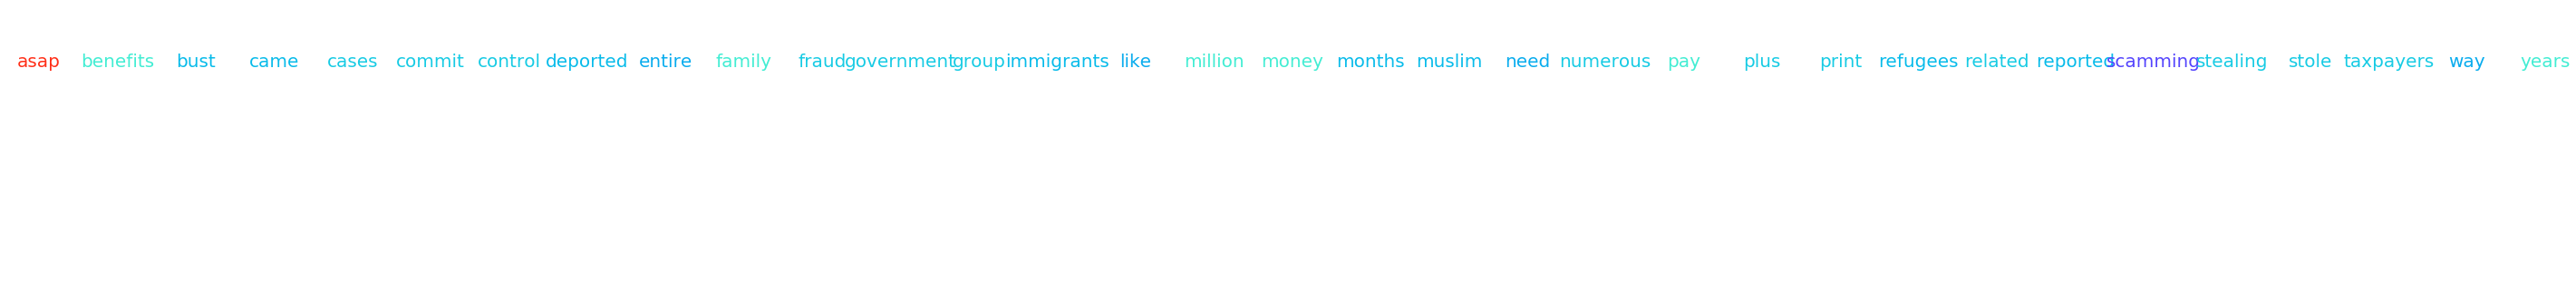

In [62]:
color_words(model, processed_texts[0])

# References

1. http://vis.stanford.edu/files/2012-Termite-AVI.pdf
2. https://nlp.stanford.edu/events/illvi2014/papers/sievert-illvi2014.pdf